In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('diamonds.csv')

In [59]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
lb = LabelEncoder()

In [62]:
df['cut_encoded'] = lb.fit_transform(df['cut'])

In [63]:
df['color_encoded'] = lb.fit_transform(df['color'])
df['clarity_encoded'] = lb.fit_transform(df['color'])

In [64]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,2,0,0
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,1,0,0
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,4,0,0
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,3,4,4


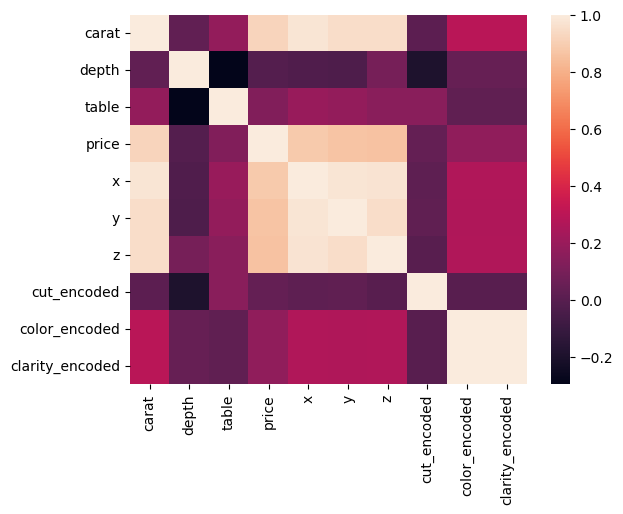

In [65]:
sns.heatmap(df.corr())

In [66]:
df.corr()

,carat,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.017124,0.291437,0.291437
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,-0.194249,0.047279,0.047279
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.150327,0.026465,0.026465
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.039860,0.172511,0.172511
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.022342,0.270287,0.270287
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.027572,0.263584,0.263584
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.002037,0.268227,0.268227
cut_encoded,0.017124,-0.194249,0.150327,0.039860,0.022342,0.027572,0.002037,1.000000,0.000304,0.000304
color_encoded,0.291437,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227,0.000304,1.000000,1.000000
clarity_encoded,0.291437,0.047279,0.026465,0.172511,0.270287,0.263584,0.268227,0.000304,1.000000,1.000000


In [67]:
y = df['price']
x = df[['carat','depth','table','cut_encoded','color_encoded','clarity_encoded']]

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=2429)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
x_train.head(3)

,carat,depth,table,cut_encoded,color_encoded,clarity_encoded
42566,0.62,62.1,55.0,2,3,3
32085,0.33,61.9,53.0,2,0,0
28176,0.30,58.0,62.0,4,0,0


In [72]:
lr = LinearRegression()

In [73]:
lr.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
x_test.head()

,carat,depth,table,cut_encoded,color_encoded,clarity_encoded
42048,0.41,61.1,56.0,2,4,4
51186,0.79,63.2,55.0,4,4,4
43106,0.60,62.8,56.0,4,1,1
37780,0.39,57.1,61.0,4,2,2
27500,2.07,63.5,53.0,2,4,4


In [75]:
lr.predict(x_test.head())

array([  640.23016148,  3762.97065267,  2899.53850804,  1095.08172773,
       14138.17571514])

In [76]:
lr.score(x_test,y_test)

0.8616553265428748

In [77]:
lr.score(x_train,y_train)

0.865034844297485

In [78]:
 #Save the model to a file using pickle
import pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(lr, model_file)

In [79]:
# Load the model from the file
with open('model.pkl', 'rb') as model_file:
    mlmodel = pickle.load(model_file)